# Context


The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantrail ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'C:\Users\Abhijeet\Desktop\ML Projects\World Happieness\happiness_score_dataset.csv')

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.shape

(158, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
df.isnull().sum() # No null values in dataset

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
# Here Happieness Rank and Country are not goin to help in futher analysis as we have happieness score already as label  
# We can go forward with dropping this columns 

In [10]:
df = df.drop(columns=['Country','Happiness Rank'])

In [11]:
df.shape

(158, 10)

In [12]:
lab_enc = LabelEncoder() # converting Region column to numeric data for processing

In [13]:
df2 = lab_enc.fit_transform(df['Region'])

In [14]:
df['Region'] = df2

In [15]:
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

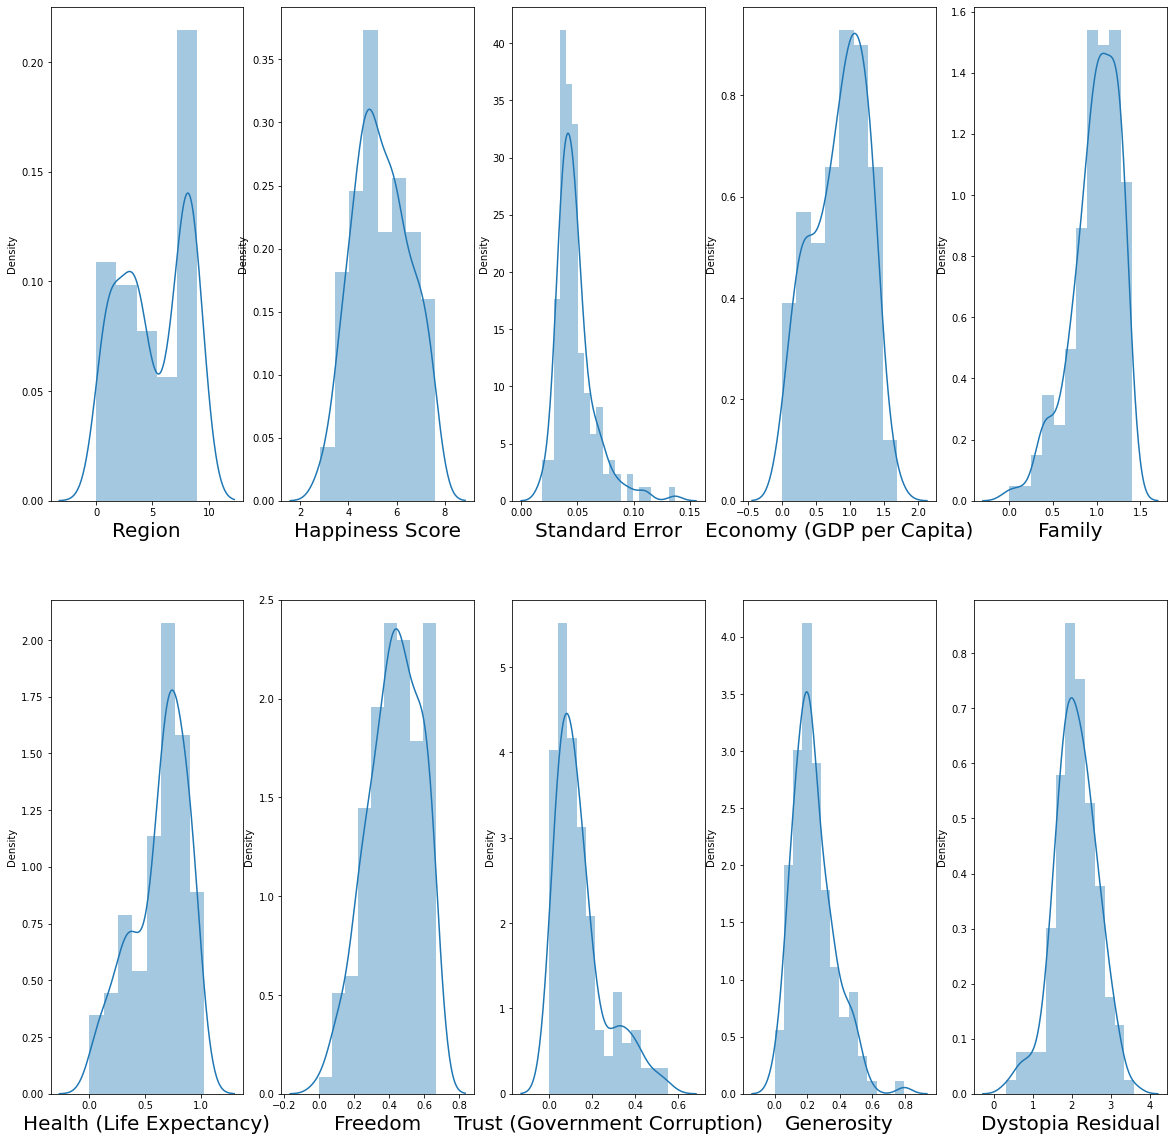

In [16]:
plt.figure(figsize = (20,20), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
    
plt.tight_layout

In [17]:
# Here we can see that our data has skewness and also has outliers 

In [18]:
# Checking for outliers

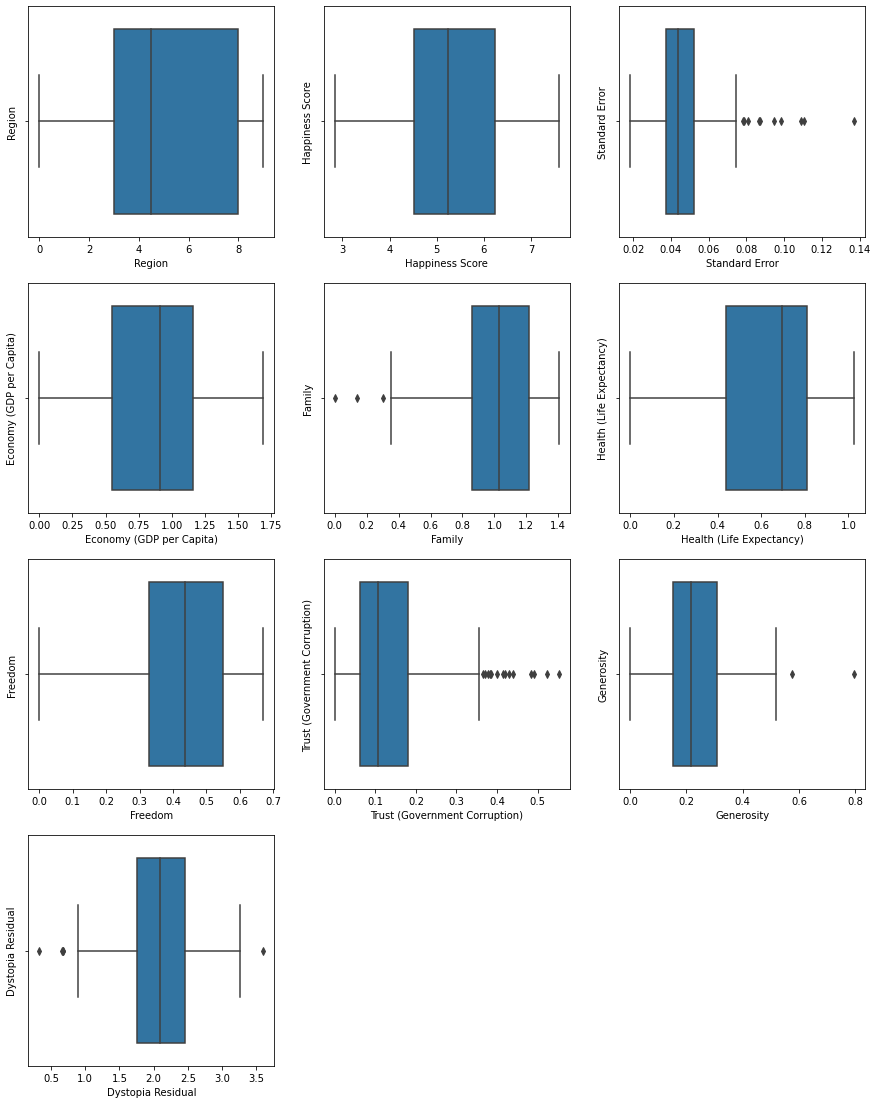

In [19]:
plt.figure(figsize = (15,50))
graph = 1

for column in df:
    if graph <=30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(df[column], orient ='h')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graph+=1   
plt.show()

In [20]:
# Here we found that we have lot of outliers in Trust and Standerd error which needs to be removed

In [21]:
df.describe()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [22]:
# Removing outliers

In [23]:
from scipy.stats import zscore

In [26]:
z_score = zscore(df[['Standard Error','Trust (Government Corruption)']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2).all(axis=1)

df= df[filtering_entry]

In [27]:
df.describe()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,4.916667,5.280371,0.045054,0.824432,0.978560,0.626245,0.410594,0.115377,0.231074,2.094105
std,2.968130,1.081748,0.010691,0.371191,0.272046,0.236070,0.145172,0.081751,0.130790,0.546233
min,0.000000,2.839000,0.018660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2.000000,4.513500,0.037510,0.546262,0.843633,0.460545,0.318732,0.058570,0.137157,1.750033
50%,4.000000,5.192000,0.043805,0.895155,1.011840,0.695745,0.419530,0.092245,0.208970,2.034510
75%,8.000000,5.984750,0.050535,1.123120,1.207047,0.789453,0.520288,0.154935,0.293070,2.449510
max,9.000000,7.561000,0.073310,1.554220,1.402230,0.991110,0.662460,0.356370,0.795880,3.602140


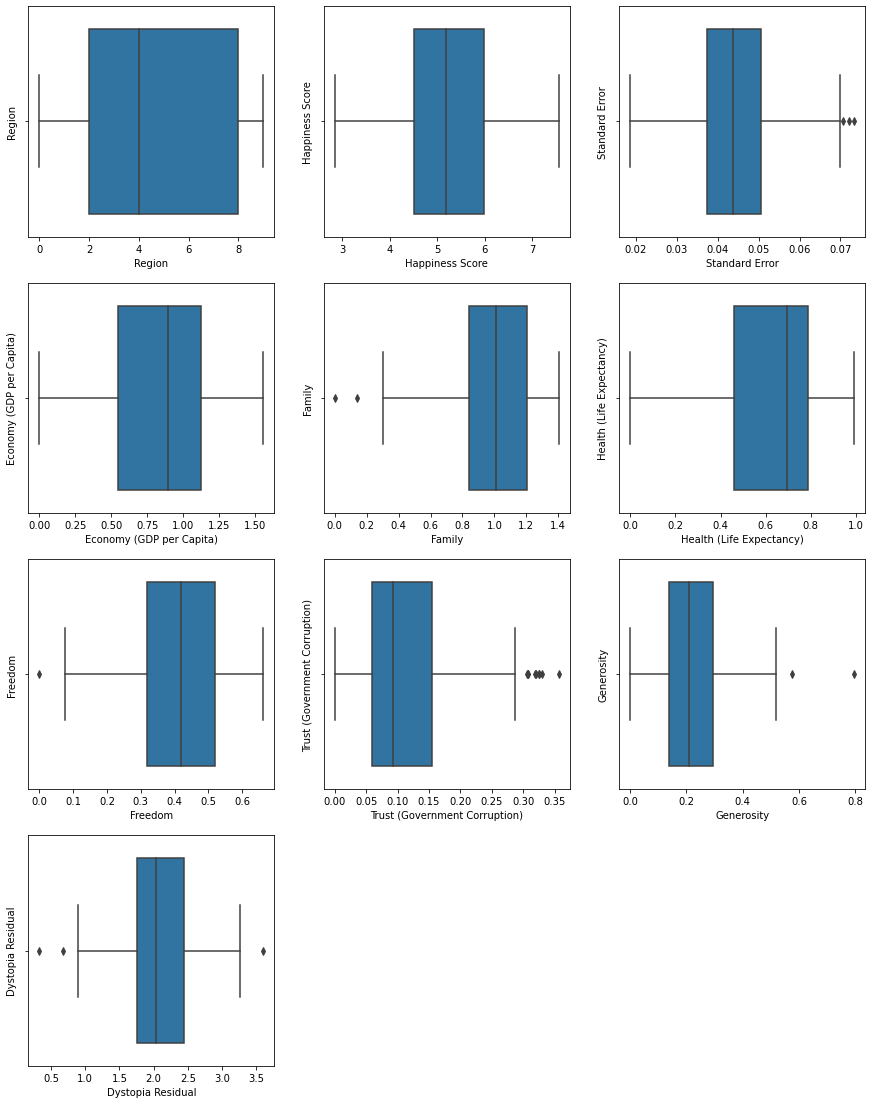

In [28]:
plt.figure(figsize = (15,50))
graph = 1

for column in df:
    if graph <=30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(df[column], orient ='h')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graph+=1   
plt.show()

In [29]:
x = df.drop(columns=['Happiness Score'])
y = df['Happiness Score']

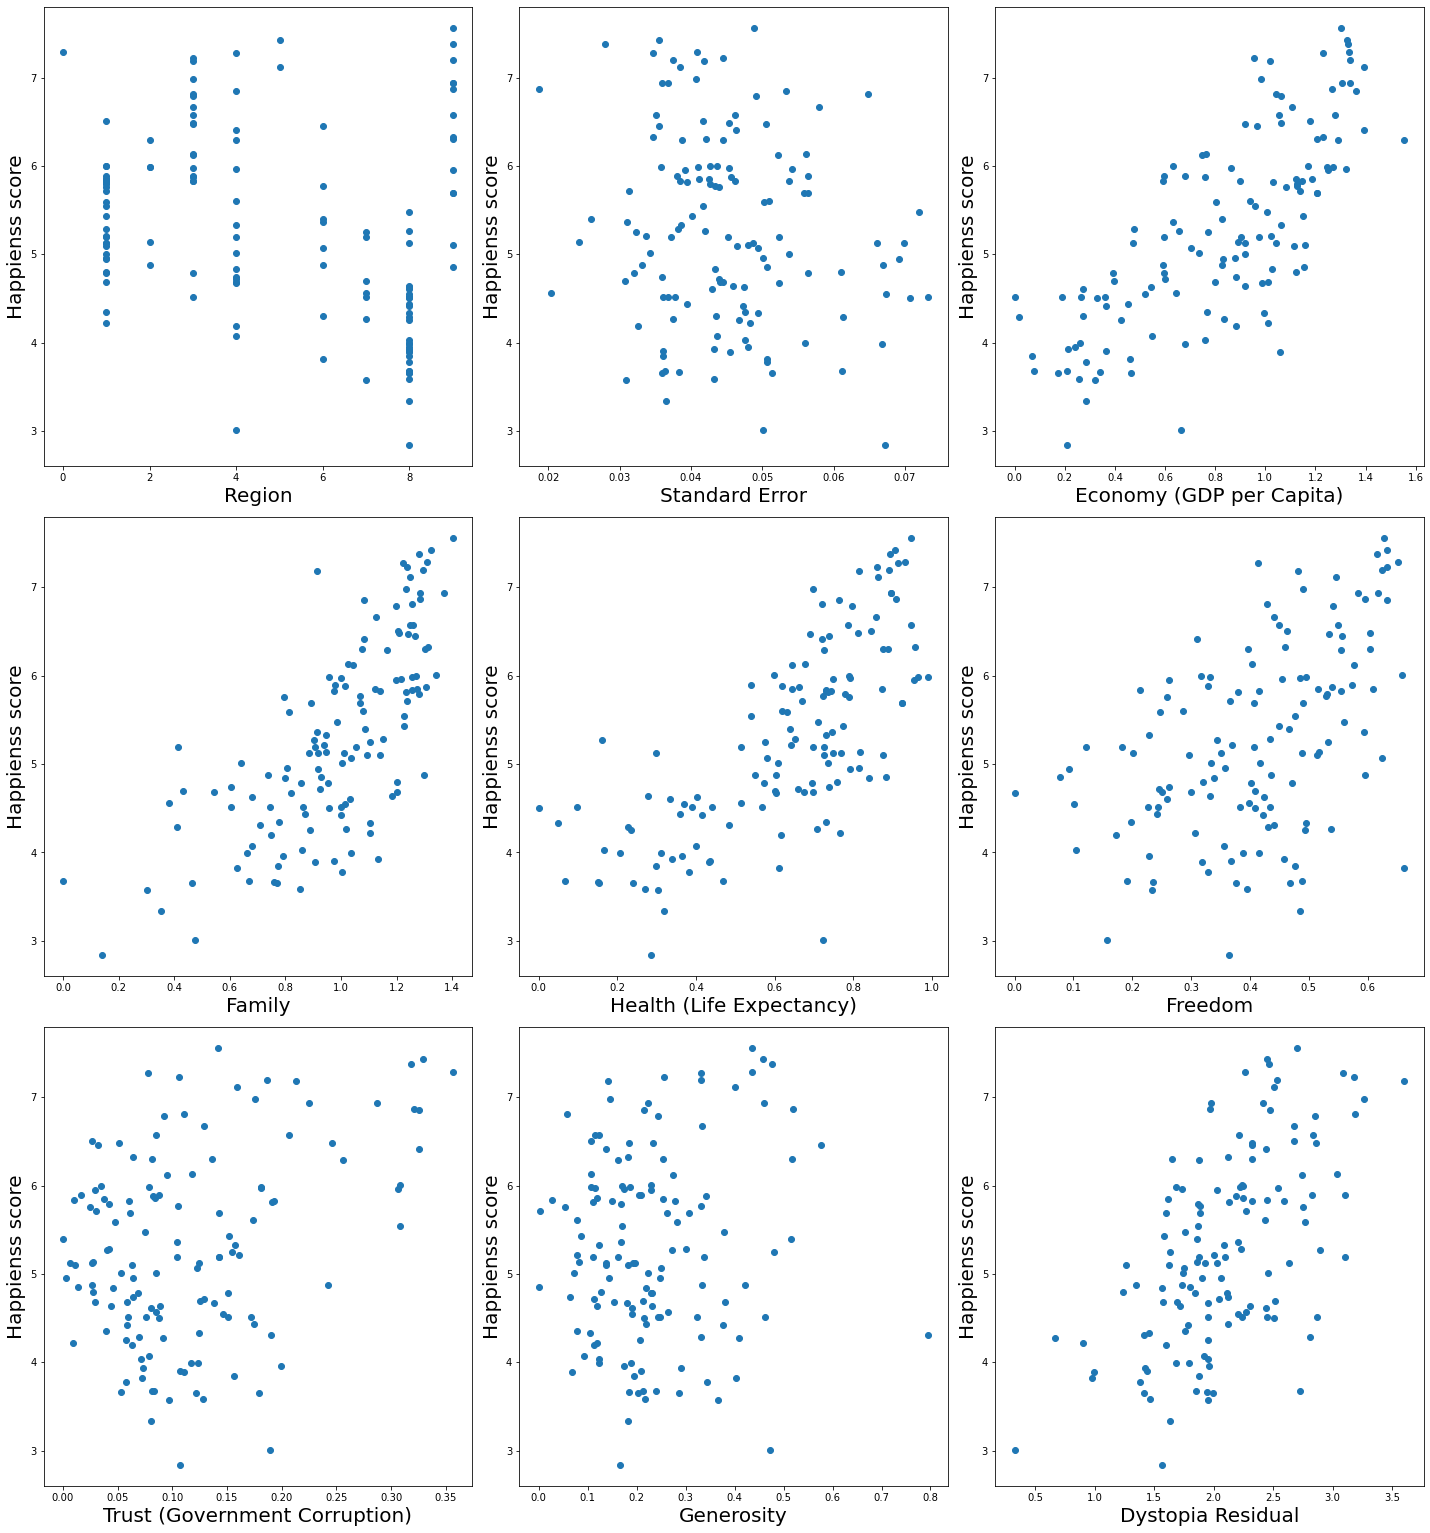

In [31]:
plt.figure(figsize = (20,35),facecolor = 'white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happienss score',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [32]:
scaler = StandardScaler()

In [33]:
x_scaled = scaler.fit_transform(x)

In [34]:
x_scaled

array([[ 1.38096673,  0.3555249 ,  1.29235059, ...,  0.32014543,
         1.57510561,  1.11714447],
       [ 0.02818299, -0.89420761,  1.35717251, ...,  2.63004599,
         1.74249665,  0.65726127],
       [ 1.38096673, -1.60217027,  1.36569104, ...,  2.48969853,
         1.88056931,  0.68287874],
       ...,
       [ 1.04277079, -0.79749653, -1.45431934, ..., -0.4331631 ,
        -0.37203357, -0.84685544],
       [-0.31001294,  0.47852637, -0.43601757, ...,  0.90474231,
         1.8474902 , -3.24449626],
       [ 1.04277079,  2.08599597, -1.66517312, ..., -0.09905511,
        -0.4932213 , -0.96818007]])

In [35]:
x_test,x_train,y_test,y_train = train_test_split(x_scaled,y,test_size=0.25,random_state=551)

In [37]:
from sklearn.ensemble import AdaBoostRegressor

In [38]:
ada = AdaBoostRegressor()

In [39]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [41]:
y_pred = ada.predict(x_train)

In [43]:
from sklearn import metrics

In [46]:
accuracy = metrics.r2_score(y_train,y_pred)# Accuracy for train data
print('Accuracy score',accuracy)


Accuracy score 0.9823469034595815


In [47]:
y_test_predict = ada.predict(x_test) 

In [49]:
accuracy = metrics.r2_score(y_test,y_test_predict)# Accuracy for Test data
print('Accuracy score',accuracy)

Accuracy score 0.7178430344122475


In [50]:
# Going for hyperparamater Tunning 

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dt = DecisionTreeRegressor()

In [88]:
params = {'n_estimators':[20,25,30,35],'learning_rate':[0.5,0.10,0.15,0.20]}

In [99]:
rns_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [100]:
rns_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.5, 0.1, 0.15, 0.2],
                                        'n_estimators': [20, 25, 30, 35]})

In [101]:
rns_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.1, n_estimators=35)

In [102]:
ada = AdaBoostRegressor(base_estimator=dt, learning_rate=0.1, n_estimators=35)

ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.1,
                  n_estimators=35)

In [103]:
y_pred = ada.predict(x_test)

print('Accuracy:', metrics.r2_score(y_test,y_pred))

Accuracy: 0.7429688141468438


In [104]:
import pickle
filename = 'World_Happ_Report.pkl'
pickle.dump(dt,open (filename,'wb'))